# Problem Statement

### Customer Segmentation Analysis

Customer segmentation is the problem of uncovering information about a firm's customer base, based on their interactions with the business. In most cases this interaction is in terms of their purchase behaviour and patterns. We explore some of the ways in which this can be used.

You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv (r"C:\Users\Pratik Pandey\Downloads\archive (5)\Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Data Visualisation and EDA

In [24]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

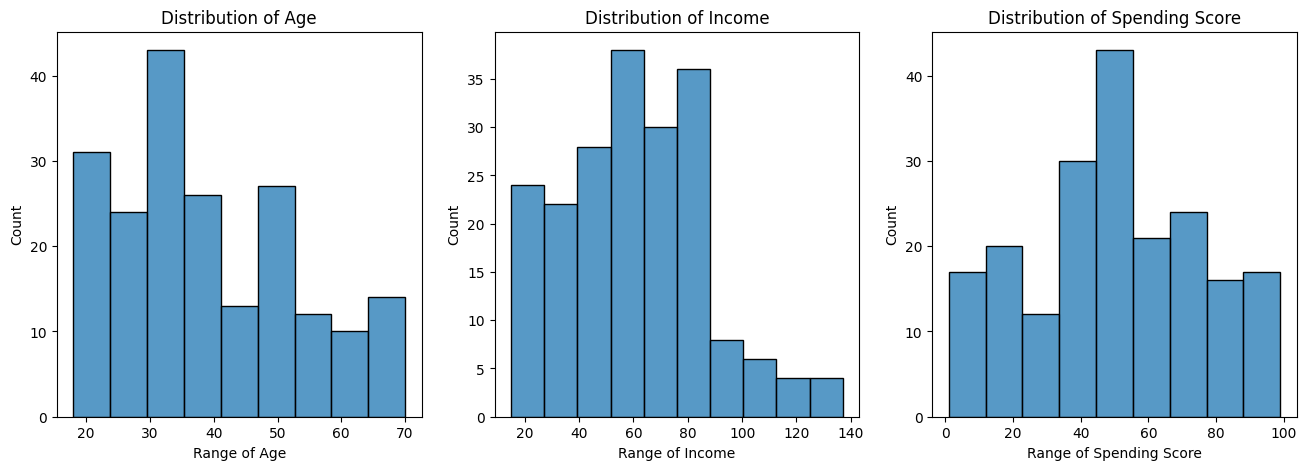

In [9]:
plt.figure(figsize = (16,5))

plt.subplot(1, 3, 1) #(1,3,1)= 1= ek hi row m, 3=3 column chahiye, 1= abhi ye phla graph h
sns.histplot(data['Age'])
plt.title("Distribution of Age")
plt.xlabel("Range of Age")
plt.ylabel("Count")

plt.subplot(1, 3, 2) 
sns.histplot(data['Annual Income (k$)'])
plt.title("Distribution of Income")
plt.xlabel("Range of Income")
plt.ylabel("Count")

plt.subplot(1, 3, 3) 
sns.histplot(data['Spending Score (1-100)'])
plt.title("Distribution of Spending Score")
plt.xlabel("Range of Spending Score")
plt.ylabel("Count")

plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

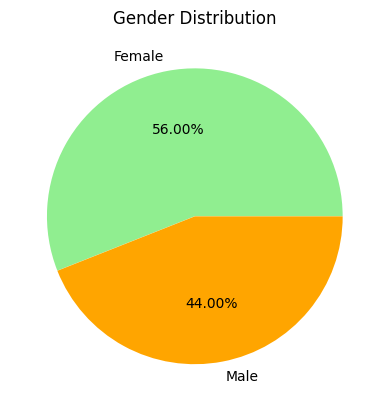

In [10]:
df = data.groupby('Genre').size()

df.plot(kind='pie', subplots = True,
       colors = ['lightgreen', 'orange'],
       explode = [0, 0.001],
       labels = ['Female', 'Male'],
       autopct = '%.2f%%')
plt.title("Gender Distribution")
plt.ylable("")
plt.show()

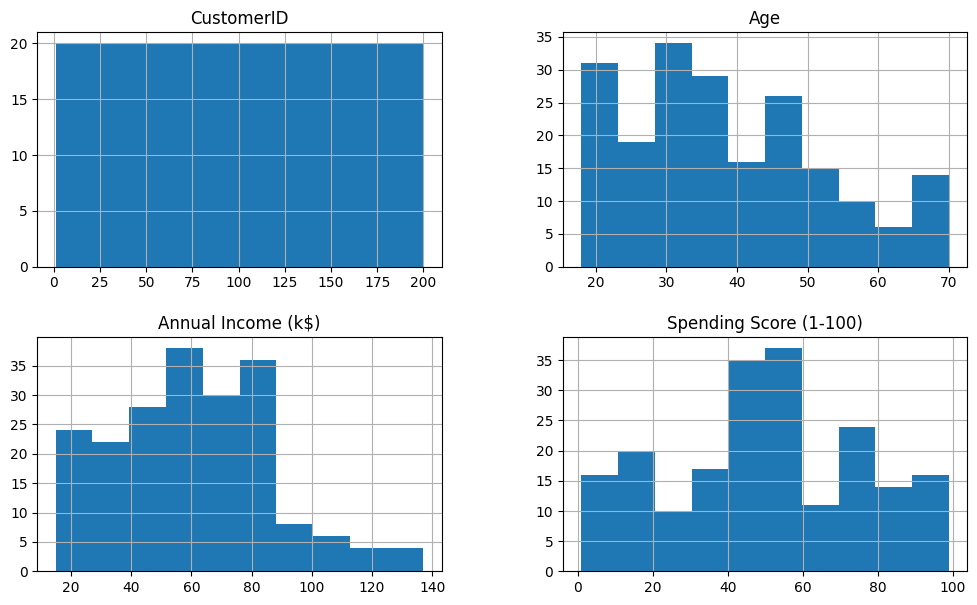

In [12]:
data.hist(figsize = (12, 7))
plt.show()

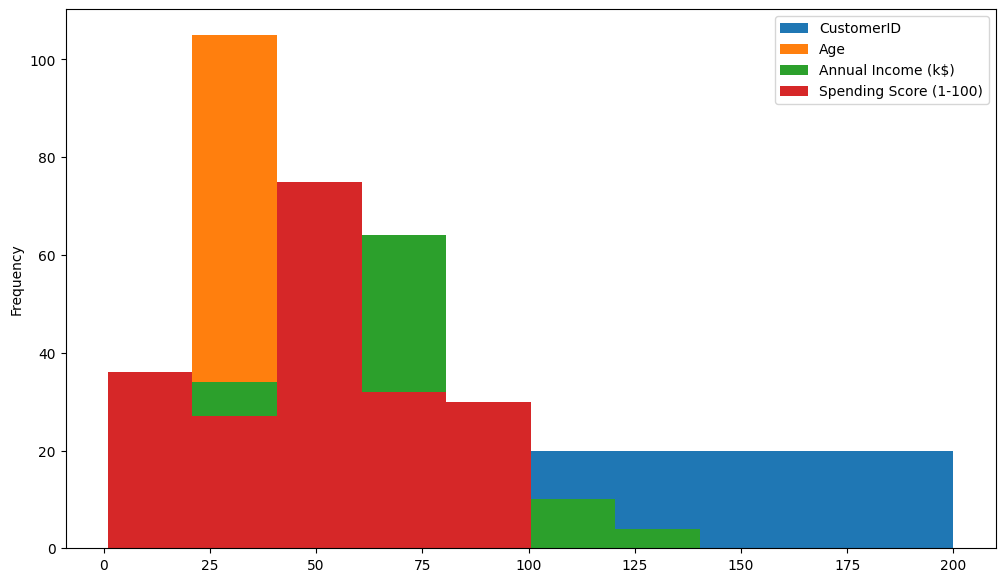

In [14]:
data.plot.hist(figsize = (12, 7))
plt.show()

C:\Users\Pratik Pandey\.conda\envs\condaenv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


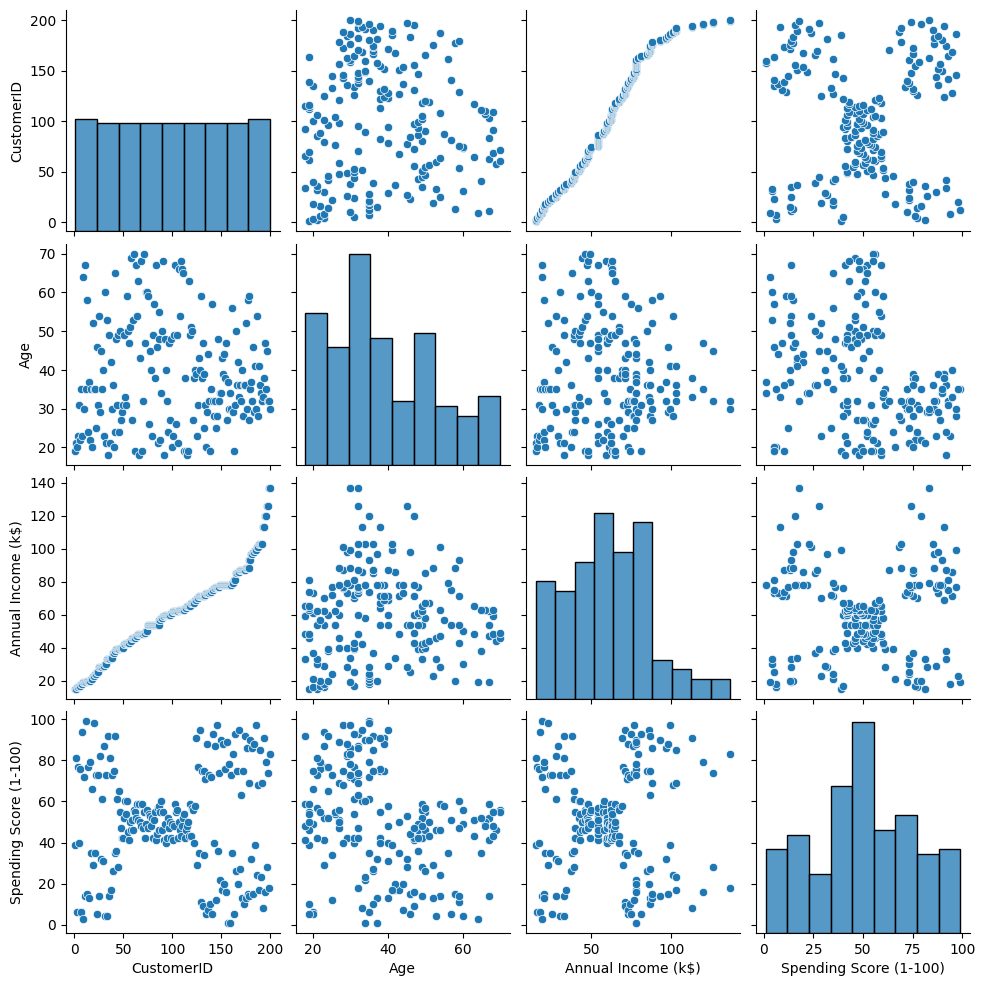

In [25]:
sns.pairplot(data)
plt.show()

C:\Users\Pratik Pandey\.conda\envs\condaenv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


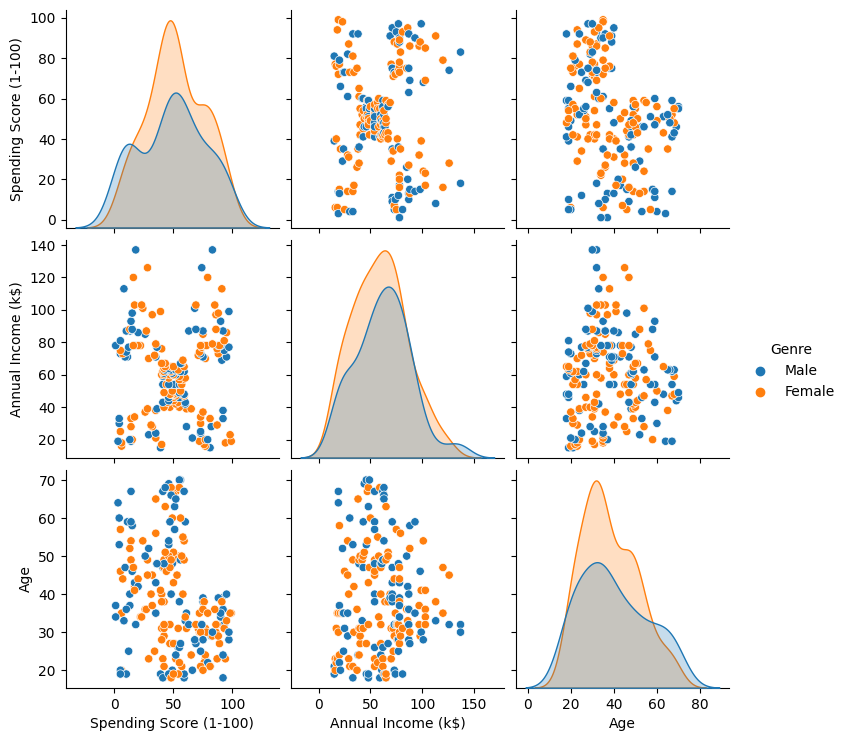

In [26]:
sns.pairplot(data, vars = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age'],
            hue = 'Genre')

# K-Means Clustering Algorithm

In [29]:
x = data.iloc[:, [3,4]].values # [3,4]= Annual Income (k$)' and 'Spending Score (1-100)'

In [30]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [19]:
k = [] # define empty list
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(x)
    k.append(kmeans.inertia_)

C:\Users\Pratik Pandey\.conda\envs\condaenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pratik Pandey\.conda\envs\condaenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pratik Pandey\.conda\envs\condaenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pratik Pandey\.conda\envs\condaenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

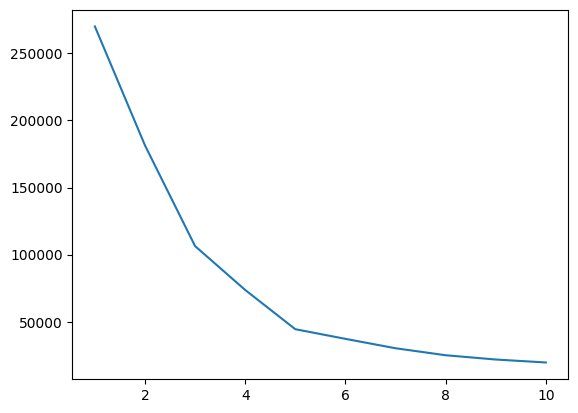

In [31]:
plt.plot(range(1, 11), k)
plt.show()
# k = 5, 5 k baad graph apne aap ko repeat kr rha h it means, number os clusters ki value 5 hai (n_clusters = 5)
#This method is called elbow method

In [33]:
model = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = model.fit_predict(x)

C:\Users\Pratik Pandey\.conda\envs\condaenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


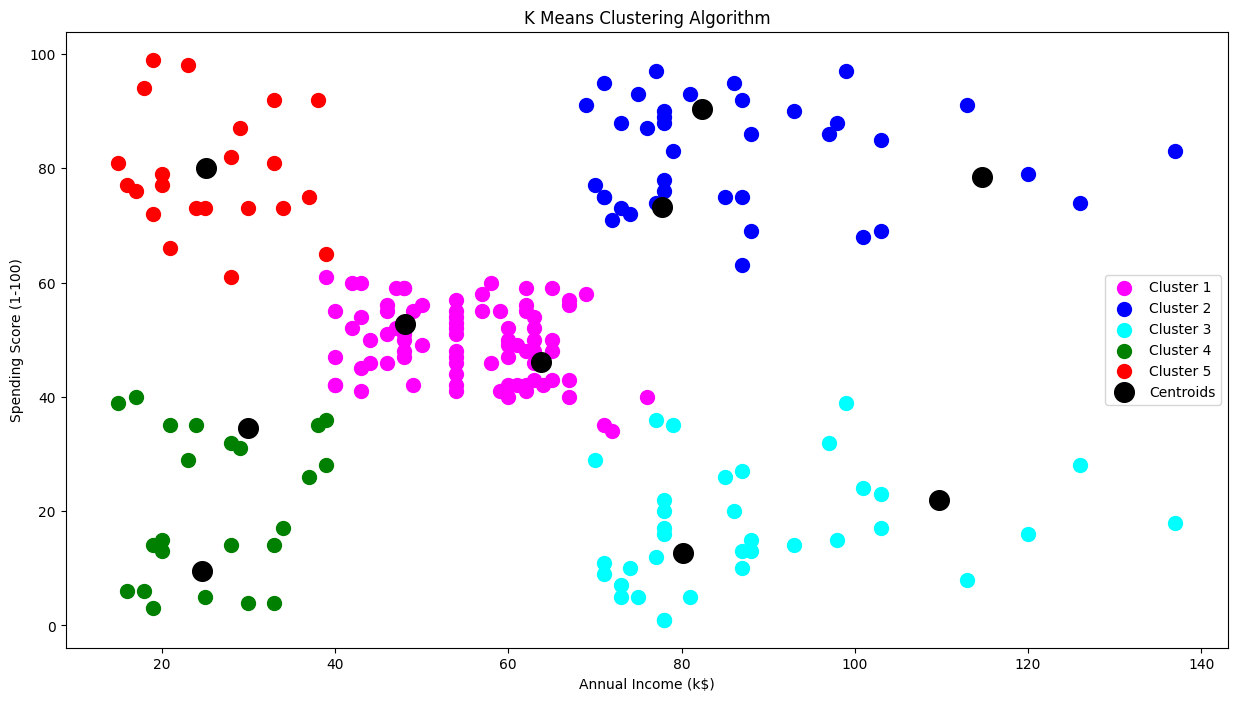

In [37]:
plt.figure(1, figsize = (15, 8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c = 'magenta', label = 'Cluster 1') ### Cluster 1
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c = 'blue', label = 'Cluster 2') ### Cluster 2
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c = 'cyan', label = 'Cluster 3') ### Cluster 1
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s=100, c = 'green', label = 'Cluster 4') ### Cluster 1
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s=100, c = 'red', label = 'Cluster 5') ### Cluster 1
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')
plt.title('K Means Clustering Algorithm')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()